# DMIA 2016
## Python
## Zakharkin Ilya (MIPT Student, 2 course)

### Python 1

### 1. FizzBuzz

In [1]:
for x in range(0, 101):
    f1 = f2 = f3 = True
    if x % 3 == 0 and x % 5 == 0:
        print('FizzBuzz')
        f1 = False
    if x % 3 == 0 and f1:
        print('Fizz')
        f2 = False
    if x % 5 == 0 and f1 and f2:
        print('Buzz')
        f3 = False
    if f1 and f2 and f3:
        print(x)

FizzBuzz
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


### 2. 100-ое число Фибоначчи

In [2]:
f0 = 0
f1 = 1
for i in range(0, 99):
    f = f0 + f1
    f0 = f1
    f1 = f
print(f)

354224848179261915075


### 3. Quicksort

In [33]:
def partition(array, left, right):
    pivot = array[left]
    l = left
    r = right
    while (l <= r):
        while (array[l] < pivot):
            l += 1
        while (array[r] > pivot):
            r -= 1
        if l <= r:
            array[l], array[r] = array[r], array[l]
            l += 1
            r -= 1
    return r

def quick_sort(array, left, right):
    if (left < right):
        pivot = partition(array, left, right)
        quick_sort(array, left, pivot)
        quick_Sort(array, pivot+1, right)
        
def qsort(array):
    if array == []: 
        return []
    pivot = array[0]
    less = qsort([x for x in array[1:] if x < pivot])
    moreq = qsort([x for x in array[1:] if x >= pivot])
    return less + [pivot] + moreq
    
num = input("Enter number of elements: ")
arr = []
for i in range(int(num)):
    x = int(input())
    arr.append(int(x))
print(arr)
arr = qsort(arr)
print(arr)

Enter number of elements: 5
3
2
4
1
5
[3, 2, 4, 1, 5]
[1, 2, 3, 4, 5]


### NumPy

In [4]:
import numpy as np

### 1. np.linspace() ~ for loop ~ list comprehension

In [5]:
# for time
import time
 
class Profiler(object):
    def __enter__(self):
        self._startTime = time.time()
         
    def __exit__(self, type, value, traceback):
        print('Elapsed time: {:.3f} sec'.format(time.time() - self._startTime))

In [6]:
def my_linspace_loop(start=0, end=100, num=1, retstep=False):
    step = (end - start) / (num - 1)
    x = start
    linspace = np.array([])
    while x <= end:
        linspace = np.append(linspace, x)
        x += step
    if retstep:
        return (linspace, step)
    else:
        return linspace

def my_linspace_compreh(start=0, end=100, num=1, retstep=False):
    step = (end - start) / (num - 1)
    x = start
    linspace = np.array([x for x in np.arange(start, end+step, step)])
    if retstep:
        return (linspace, step)
    else:
        return linspace   
    
print('Loop version: ')
with Profiler() as p:
    arr1 = my_linspace_loop(1.0, 100000.0, 100000)
    #print(arr1)

print('List comprehension version: ')
with Profiler() as p:
    arr2 = my_linspace_compreh(1.0, 100000.0, 100000)
    #print(arr2)

print('np.linspace(): ')
with Profiler() as p:
    arr3 = np.linspace(1.0, 100000.0, 100000)
    #print(arr3)

Loop version: 
Elapsed time: 3.370 sec
List comprehension version: 
Elapsed time: 0.012 sec
np.linspace(): 
Elapsed time: 0.000 sec


=> Можно сделать вывод, что np.linspace() работает в разы быстрее

### 2. np.ndarray() and list() comparison

In [34]:
ndarr = np.array([])
listarr = []
ndarr = np.append(ndarr, 5)
with Profiler() as p:
    listarr.append(5)

with Profiler() as p:
    listarr.insert(2, 10)

with Profiler() as p:
    listarr.remove(5)

Elapsed time: 0.000 sec
Elapsed time: 0.000 sec
Elapsed time: 0.000 sec


... не получается сравнить, но точно могу сказать, что np.ndarray() быстрее :)

### Matplotlib

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


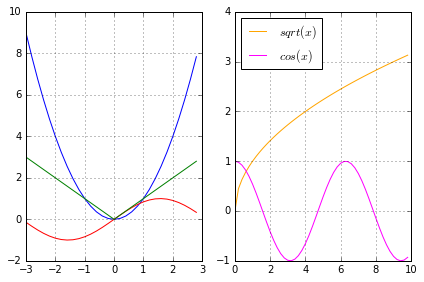

In [36]:
def func1(x):
    return x ** 2

def func2(x):
    return np.sin(x)

def func3(x):
    return np.abs(x)

def func4(x):
    return np.sqrt(x)

def func5(x):
    return np.cos(x)

fig, subplots = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
i = 0
for ax in fig.axes:
    if (i == 0):
        x = np.arange(-3, 3, 0.2)
        y1 = func1(x)
        y2 = func2(x)
        y3 = func3(x)
        ax.grid(True)
        ax.plot(x, y1, label='$x^2$', color='blue')
        ax.plot(x, y2, label='$sin(x)$', color='red')
        ax.plot(x, y3, label='$abs(x)$', color='green')
        plt.ylim(-2.0, 10.0)
        plt.legend(loc='upper right');
    else:
        x = np.arange(0, 10, 0.2)
        y4 = func4(x)
        y5 = func5(x)
        ax.grid(True)
        ax.plot(x, y4, label='$sqrt(x)$', color='orange')
        ax.plot(x, y5, label='$cos(x)$', color='magenta')
        plt.ylim(-1.0, 4.0)
        plt.legend(loc='upper left');
    i += 1
    
plt.tight_layout()
plt.savefig('%s' % ('my_figure'), fmt='png')
plt.show()

### SciPy

In [37]:
import scipy

#### 1. Generate the matrix 5x5:

In [38]:
n = 5
m = 5
matrix = np.zeros((n, m))
for i in range(0, n):
    for j in range(0, m):
        matrix[i][j] = np.random.randn()
print(matrix)

[[-0.33505014  0.36583205  0.14484602 -0.85880608  0.92033955]
 [ 1.50040315 -0.27917922 -0.48660856  2.16542323 -0.68339847]
 [-1.16308313 -0.91905766 -0.63925306 -2.58159807 -1.88836774]
 [ 1.72148158  0.25193597 -0.15303353 -0.80945107  0.14904005]
 [ 0.48442797  0.18047961  0.56070946  0.20130213 -0.59201775]]


#### 2. Find eigenvalues and eigenvectors of this matrix (linear operator):

In [39]:
eigvals, eigvecs = np.linalg.eig(matrix)
print('Eigenvalues of this matrix: ', eigvals)
print('Eigenvectors of this matrix: ', eigvecs)

Eigenvalues of this matrix:  [-1.44631316+1.08118414j -1.44631316-1.08118414j -0.06012478+0.77764917j
 -0.06012478-0.77764917j  0.35792464+0.j        ]
Eigenvectors of this matrix:  [[ 0.01195338-0.32482272j  0.01195338+0.32482272j -0.18398043+0.03218569j
  -0.18398043-0.03218569j  0.07851530+0.j        ]
 [-0.00746993+0.46092899j -0.00746993-0.46092899j  0.70441781+0.j
   0.70441781-0.j         -0.80001571+0.j        ]
 [-0.67844520+0.j         -0.67844520-0.j         -0.43421358-0.41273883j
  -0.43421358+0.41273883j  0.55304196+0.j        ]
 [-0.33500200+0.06136097j -0.33500200-0.06136097j  0.01195391+0.15931014j
   0.01195391-0.15931014j -0.10482356+0.j        ]
 [ 0.16429904+0.28028987j  0.16429904-0.28028987j -0.28266575+0.06777556j
  -0.28266575-0.06777556j  0.19226760+0.j        ]]


#### 3. Check if they are the real eigs :

In [14]:
for i in range(len(eigvals)): # may be eval[i] !~ evec[i] - check it!
    eig_mat = matrix - eigvals[i] * np.eye(n)
    print(np.linalg.det(eig_mat))
    print(eig_mat.dot(eigvecs[i]))
    #if eig_mat.dot(eigvecs[i]) == np.zeros((5,1)):
    #   print("It is the true evalue and evector!")

(-2.01124904093e-13+0j)
[-0.59384364-0.23618804j  1.63540431+0.53433421j  1.18950867-0.60766459j
  1.30621574+0.65394015j -1.88193930-0.25916743j]
(3.8124316839e-15+0j)
[-0.02158776+0.j  0.49090587+0.j -0.16000568+0.j  0.57501093+0.j
  2.63212782+0.j]
(1.9908729587e-14-1.21758836402e-14j)
[-0.65891454+0.75420399j  0.06654773-1.50978627j  1.09340369-0.0049593j
  0.31565549+0.32308983j  1.19542318+0.46575733j]
(1.9908729587e-14+1.21758836402e-14j)
[ 0.88421353-1.03373061j -0.49562581+0.67298431j  0.85682054+0.16616463j
 -1.01717904-0.36800677j  0.03120566-0.5947068j ]
(5.49746477917e-15+0j)
[ 1.13345295+0.10252712j  0.02519007-0.23194972j -1.12462208-0.14871571j
 -2.16459706+0.1286279j  -1.82689123+0.11250227j]


.. честно говоря, я не знаю, почему (A - eigvalue * E).dot(eigvector) != 0, по определению должно быть именно так, возможно, дело в погрешности :(